In [2]:
#Loading libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Display all columns
pd.set_option("display.max.columns",0)
pd.set_option("display.max.rows",0)

In [3]:
#Loading and creating df from csv
fpath = "/Users/echo/Documents/CodingDojo/Independent Projects/School-Shootings/Data/school-shootings-data.csv"
df = pd.read_csv(fpath)
df.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,city,state,school_type,enrollment,killed,injured,casualties,shooting_type,age_shooter1,gender_shooter1,race_ethnicity_shooter1,shooter_relationship1,shooter_deceased1,deceased_notes1,age_shooter2,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,shooter_deceased2,deceased_notes2,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,weapon,weapon_source,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,Littleton,Colorado,public,1965,13,21,34,indiscriminate,18.0,m,w,student,1.0,suicide,17.0,m,w,student,1.0,suicide,1783.0,16.0,112,42.0,12.0,NaN,NaN,1,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,39.603910,-105.075000,89.6,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,Baton Rouge,Louisiana,public,588,0,1,1,targeted,14.0,m,NaN,former student (expelled),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,583.0,0,0.0,0.0,NaN,NaN,0,.22 caliber pistol,NaN,30.529958,-91.169966,39.0,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,Conyers,Georgia,public,1369,0,6,6,indiscriminate,15.0,m,w,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1189.0,136.0,28,15.0,1.0,NaN,NaN,1,".22 caliber rifle, 357-caliber Magnum handgun",NaN,33.626922,-84.047960,84.0,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,Philadelphia,Pennsylvania,public,3147,0,1,1,targeted,17.0,m,NaN,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.0,2736.0,27,170.0,5.0,NaN,NaN,1,RG .25-caliber pistol,purchased from friend,39.921509,-75.234108,41.0,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,Boston,Massachusetts,public,1116,0,1,1,targeted,NaN,m,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,755.0,287,29.0,5.0,NaN,NaN,0,NaN,NaN,42.285268,-71.075901,NaN,9,12,543,Suffolk County,25,25025,11.0


In [4]:
#Dropping duplicates
df = df.drop_duplicates()

In [5]:
#Checking out null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 386
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               387 non-null    int64  
 1   nces_school_id                    381 non-null    object 
 2   school_name                       387 non-null    object 
 3   nces_district_id                  363 non-null    float64
 4   district_name                     362 non-null    object 
 5   date                              387 non-null    object 
 6   school_year                       387 non-null    object 
 7   year                              387 non-null    int64  
 8   time                              363 non-null    object 
 9   day_of_week                       387 non-null    object 
 10  city                              387 non-null    object 
 11  state                             387 non-null    object 
 12  school_t

# Data Cleaning

In [6]:
#Getting the sum of all missing values
null_sums = df.isna().sum()
null_sums

uid                   0
nces_school_id        6
school_name           0
nces_district_id     24
district_name        25
date                  0
school_year           0
year                  0
time                 24
day_of_week           0
city                  0
state                 0
                   ... 
weapon              138
weapon_source       282
lat                   1
long                  1
staffing             24
low_grade             5
high_grade            5
lunch                50
county                2
state_fips            0
county_fips           0
ulocale               3
Length: 50, dtype: int64

In [7]:
#Finding percentages of missing values
null_percentage = null_sums/len(df) * 100
null_percentage

uid                  0.000000
nces_school_id       1.550388
school_name          0.000000
nces_district_id     6.201550
district_name        6.459948
date                 0.000000
school_year          0.000000
year                 0.000000
time                 6.201550
day_of_week          0.000000
city                 0.000000
state                0.000000
                      ...    
weapon              35.658915
weapon_source       72.868217
lat                  0.258398
long                 0.258398
staffing             6.201550
low_grade            1.291990
high_grade           1.291990
lunch               12.919897
county               0.516796
state_fips           0.000000
county_fips          0.000000
ulocale              0.775194
Length: 50, dtype: float64

In [8]:
#Dropping columns not used in analysis
df.drop(columns=["uid", "nces_school_id", "nces_district_id", 
                 "low_grade", "high_grade", "lunch", "state_fips", "county_fips", "ulocale", "killed", "injured"], inplace=True)

# Categorical Columns Cleaning


In [9]:
#Fixing string inconsistencies
#First, obtaining all features with string values
str_cols = df.select_dtypes(include="object").columns
str_cols

Index(['school_name', 'district_name', 'date', 'school_year', 'time',
       'day_of_week', 'city', 'state', 'school_type', 'enrollment',
       'shooting_type', 'gender_shooter1', 'race_ethnicity_shooter1',
       'shooter_relationship1', 'deceased_notes1', 'gender_shooter2',
       'race_ethnicity_shooter2', 'shooter_relationship2', 'deceased_notes2',
       'hispanic', 'weapon', 'weapon_source', 'county'],
      dtype='object')

In [10]:
#Looping thru each column and getting value_counts to see out of place values in each feature
for col in str_cols:
    print(f"Value counts for {col}: ")
    print(df[col].value_counts())
    #Increase readibility with new lines between results
    print("\n")

Value counts for school_name: 
Central High School                    3
Booker T. Washington High School       3
West High School                       2
East High School                       2
Benjamin Banneker High School          2
Gardena High School                    2
Oliver Citywide Academy                2
North Forest High School               2
Benjamin Franklin High School          2
Huffman High School                    2
Highland High School                   2
Ribault High School                    2
                                      ..
LeFlore High School                    1
Chardon High School                    1
Millard South High School              1
Armin Jahr Elementary School           1
Walpole Elementary School              1
Cummings Middle School                 1
Cape Fear High School                  1
Ross Elementary School                 1
Sheeler Charter High School            1
Martinsville West Middle               1
Louisiana Schnell Elementa

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 386
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   school_name                       387 non-null    object 
 1   district_name                     362 non-null    object 
 2   date                              387 non-null    object 
 3   school_year                       387 non-null    object 
 4   year                              387 non-null    int64  
 5   time                              363 non-null    object 
 6   day_of_week                       387 non-null    object 
 7   city                              387 non-null    object 
 8   state                             387 non-null    object 
 9   school_type                       387 non-null    object 
 10  enrollment                        387 non-null    object 
 11  casualties                        387 non-null    int64  
 12  shooting

### Cleaning `deceased_notes1`

In [12]:
#Correcting inconsistent values
df["deceased_notes1"].value_counts()

suicide             35
police shooting      2
killed by police     1
Name: deceased_notes1, dtype: int64

In [13]:
#"deceased_notes1" values are inconsistent, going to standardize with .str.replace
#Convert using .str.replace("old","new")
df["deceased_notes1"] = df["deceased_notes1"].replace({"killed by police":"police shooting"}, regex=True)
df["deceased_notes1"].value_counts()
#We now have standardized our Item_Fat_Content feature

suicide            35
police shooting     3
Name: deceased_notes1, dtype: int64

### Cleaning `Weapon`

In [14]:
df["weapon"].value_counts(dropna=False)

NaN                                                                      138
handgun                                                                   62
9mm handgun                                                                8
pistol                                                                     7
shotgun                                                                    4
.22-caliber pistol                                                         4
revolver                                                                   4
.40-caliber handgun                                                        3
.45-caliber handgun                                                        3
.25-caliber handgun                                                        3
.22-caliber handgun                                                        3
rifle                                                                      3
                                                                        ... 

In [15]:
rename_dict = {"9 mm semi-automatic Ruger":"9mm handgun",
              "MAC 90 7.26 mm assault rifle":"rifle",
              "long-barrel shotgun":"shotgun",
              ".40 S&W caliber Glock":".40-caliber handgun",
              "22 pistol": ".22-caliber pistol",
              "Smith & Wesson .357-caliber revolver":"revolver",
              "AK-47,":"rifle", "small-caliber semiautomatic handgun":"handgun",
              "high-powered rifle":"rifle", "single-shot shotgun":"shotgun",
              ".270 Winchester rifle with scope":"rifle",
              ".38 semiautomatic handgun":".38-caliber handgun"}

In [16]:
#"deceased_notes1" values are inconsistent, going to standardize with .str.replace
#Convert using .str.replace("old","new")

df["weapon"] = df["weapon"].replace(rename_dict, regex=True)
df["weapon"].value_counts()
#We now have standardized our Item_Fat_Content feature

handgun                                              63
9mm handgun                                           9
pistol                                                7
rifle                                                 6
shotgun                                               5
.22-caliber pistol                                    4
.38-caliber handgun                                   4
revolver                                              4
.40-caliber handgun                                   3
.25-caliber handgun                                   3
.22-caliber handgun                                   3
.45-caliber handgun                                   3
                                                     ..
.22-caliber revolver, .38-caliber revolver            1
.44 caliber handgun                                   1
9mm handgun, a shotgun, a 30.06 rifle                 1
shotgun, 22-pistol                                    1
.40-caliber handgun .22-caliber pistol, revolver

# EDA

## Heatmap

In [17]:
#Finding correlation between our numeric data
corr = df.corr(numeric_only = True)
#Rounding off for visibility
corr.round(2)

,year,casualties,age_shooter1,shooter_deceased1,age_shooter2,shooter_deceased2,white,black,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,lat,long,staffing
year,1.00,-0.05,0.04,0.09,-0.26,-0.73,-0.08,-0.08,-0.04,-0.11,-0.05,0.09,-0.23,0.03,0.05,0.00
casualties,-0.05,1.00,-0.03,0.17,0.14,0.97,0.23,-0.13,0.03,0.12,-0.03,0.00,0.14,-0.04,-0.07,0.02
age_shooter1,0.04,-0.03,1.00,0.18,-0.04,-0.10,-0.07,-0.18,-0.06,-0.04,-0.15,-0.11,-0.10,0.00,0.02,-0.18
shooter_deceased1,0.09,0.17,0.18,1.00,-0.00,1.00,0.12,-0.24,-0.05,0.17,-0.04,0.21,-0.05,0.16,-0.12,-0.04
age_shooter2,-0.26,0.14,-0.04,-0.00,1.00,-0.00,-0.10,-0.21,-0.08,-0.40,-0.37,-0.21,0.28,-0.13,0.32,-0.32
shooter_deceased2,-0.73,0.97,-0.10,1.00,-0.00,1.00,0.74,-0.51,-0.11,0.88,NaN,NaN,0.32,0.19,-0.58,0.43
white,-0.08,0.23,-0.07,0.12,-0.10,0.74,1.00,-0.26,0.24,0.11,0.06,0.53,0.19,0.08,-0.08,0.44
black,-0.08,-0.13,-0.18,-0.24,-0.21,-0.51,-0.26,1.00,0.04,-0.12,-0.08,0.04,0.15,-0.12,0.31,0.38
asian,-0.04,0.03,-0.06,-0.05,-0.08,-0.11,0.24,0.04,1.00,0.05,0.66,0.53,0.04,-0.07,-0.36,0.46
american_indian_alaska_native,-0.11,0.12,-0.04,0.17,-0.40,0.88,0.11,-0.12,0.05,1.00,0.06,0.21,0.06,0.09,-0.20,0.08


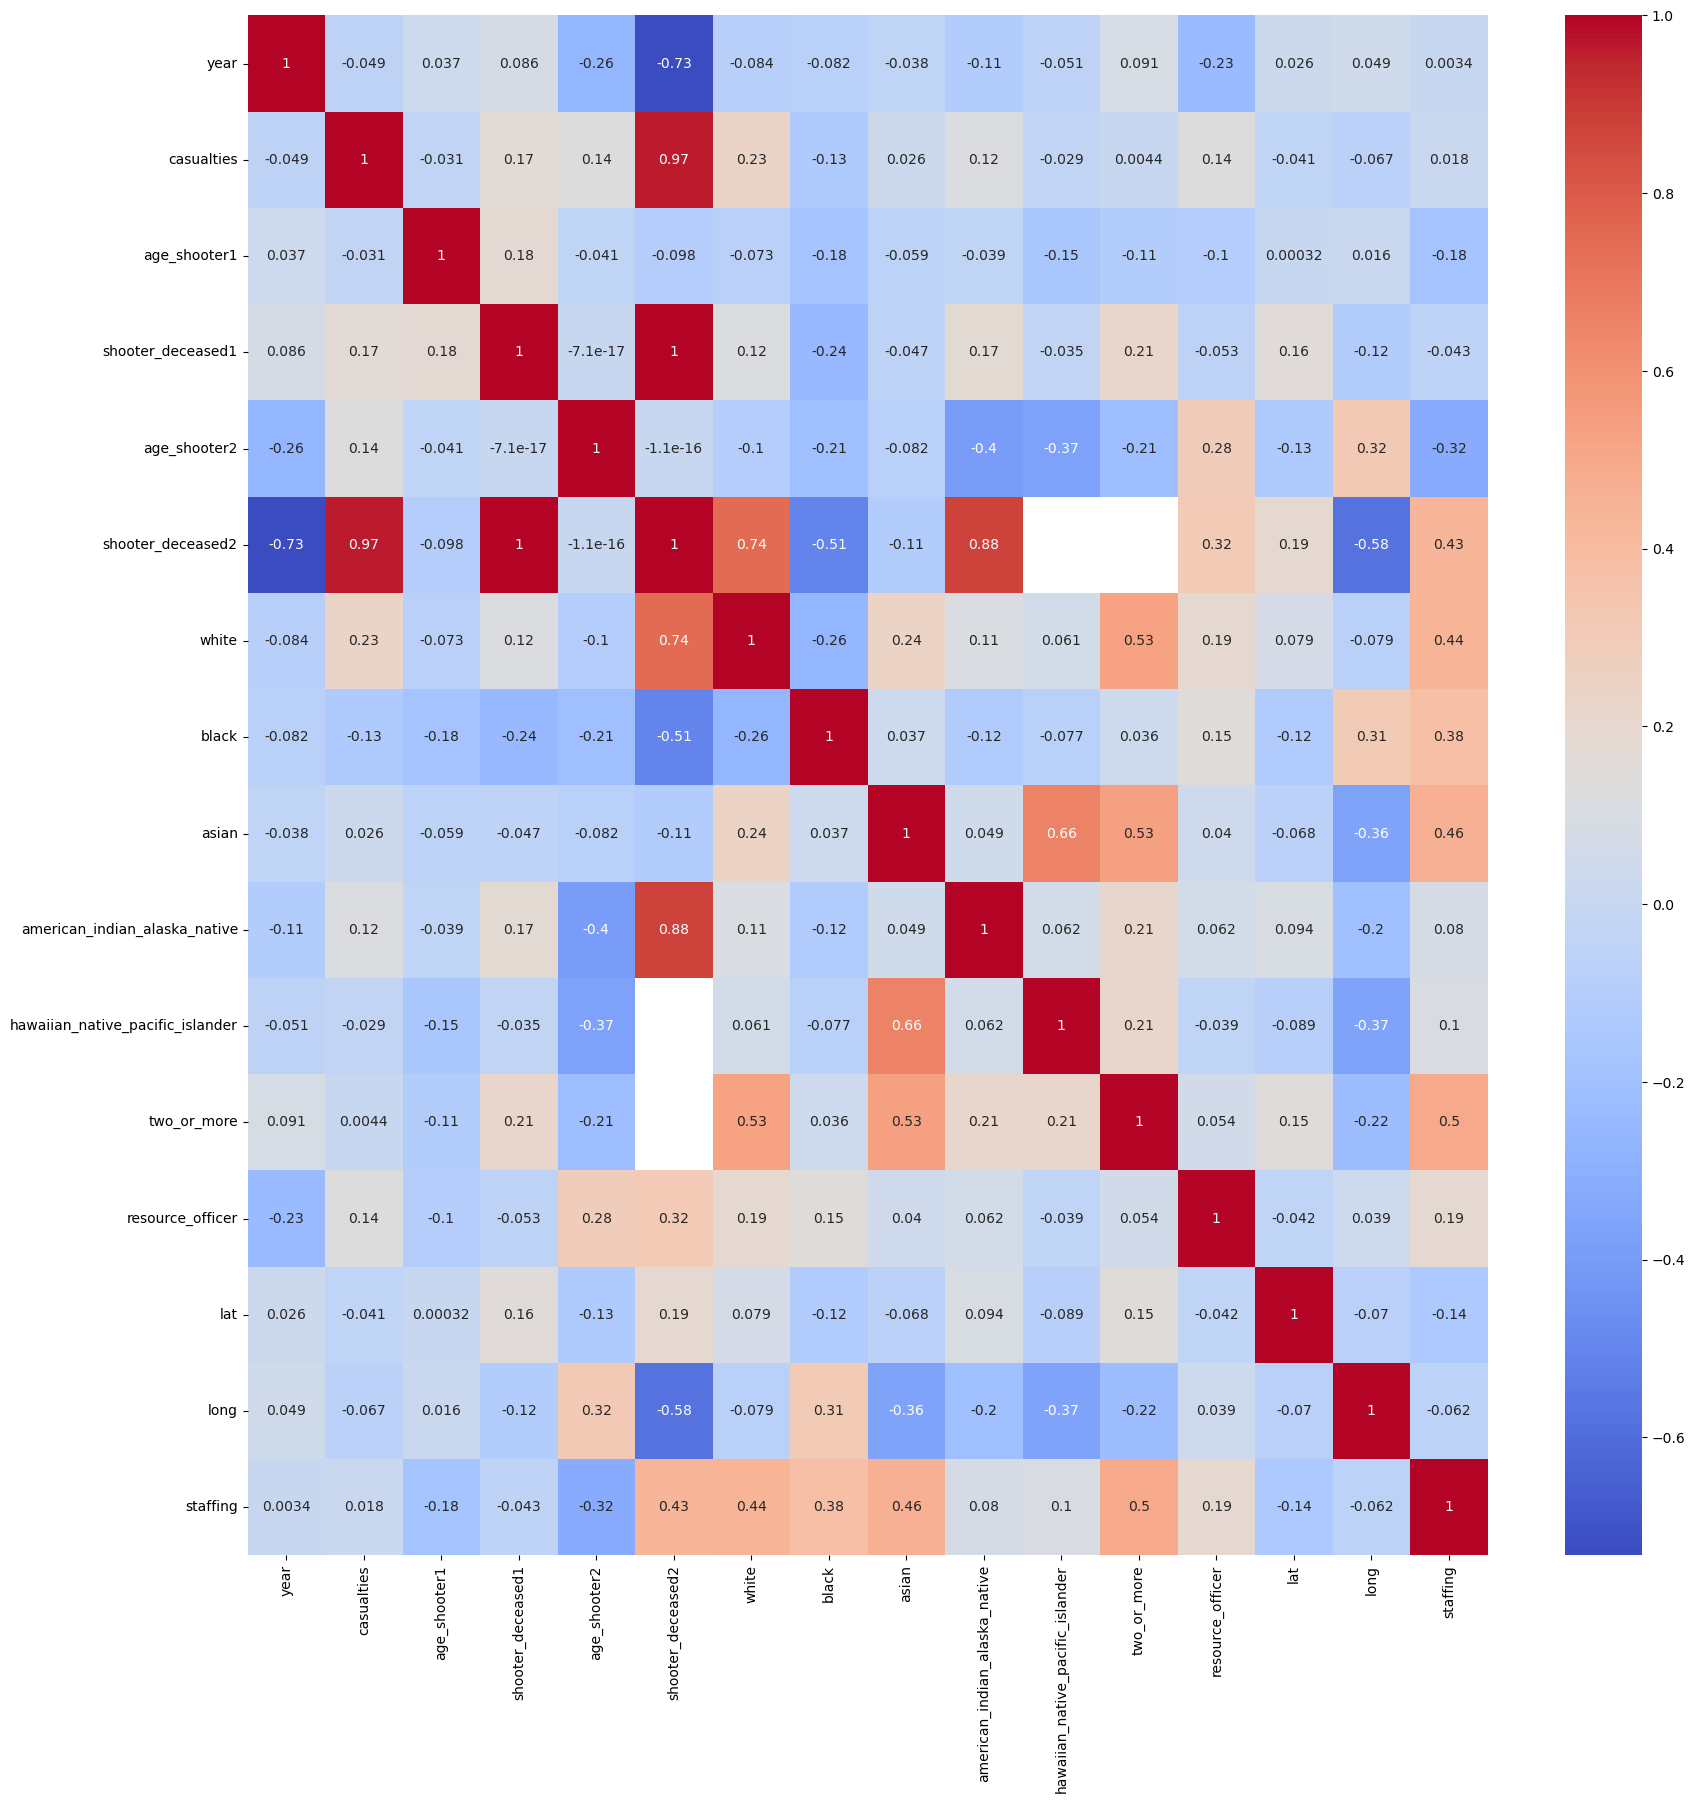

In [18]:
#Creating a heatmap to easily show correlations in our numeric data
# Create a fig, ax with a figsize argument
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

## Looking at 1999

In [19]:
#Filtering all the shootings that happpend in 1999
df.loc[df["year"]==1999]

,school_name,district_name,date,school_year,year,time,day_of_week,city,state,school_type,enrollment,casualties,shooting_type,age_shooter1,gender_shooter1,race_ethnicity_shooter1,shooter_relationship1,shooter_deceased1,deceased_notes1,age_shooter2,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,shooter_deceased2,deceased_notes2,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,weapon,weapon_source,lat,long,staffing,county
0,Columbine High School,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,Littleton,Colorado,public,1965,34,indiscriminate,18.0,m,w,student,1.0,suicide,17.0,m,w,student,1.0,suicide,1783.0,16.0,112,42.0,12.0,NaN,NaN,1,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,39.603910,-105.075000,89.6,Jefferson County
1,Scotlandville Middle School,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,Baton Rouge,Louisiana,public,588,1,targeted,14.0,m,NaN,former student (expelled),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,583.0,0,0.0,0.0,NaN,NaN,0,.22 caliber pistol,NaN,30.529958,-91.169966,39.0,East Baton Rouge Parish
2,Heritage High School,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,Conyers,Georgia,public,1369,6,indiscriminate,15.0,m,w,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1189.0,136.0,28,15.0,1.0,NaN,NaN,1,".22 caliber rifle, 357-caliber Magnum handgun",NaN,33.626922,-84.047960,84.0,Rockdale County
3,John Bartram High School,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,Philadelphia,Pennsylvania,public,3147,1,targeted,17.0,m,NaN,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.0,2736.0,27,170.0,5.0,NaN,NaN,1,RG .25-caliber pistol,purchased from friend,39.921509,-75.234108,41.0,Philadelphia County
4,Dorchester High School,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,Boston,Massachusetts,public,1116,1,targeted,NaN,m,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,755.0,287,29.0,5.0,NaN,NaN,0,NaN,NaN,42.285268,-71.075901,NaN,Suffolk County
5,Deming Middle School,Deming Public Schools,11/19/1999,1999-2000,1999,12:45 PM,Friday,Deming,New Mexico,public,753,1,accidental or targeted,12.0,m,h,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,6.0,583,2.0,2.0,NaN,NaN,0,.22-caliber Colt revolver,home,32.261547,-107.762986,44.0,Luna County
6,Fort Gibson Middle School,Fort Gibson,12/6/1999,1999-2000,1999,7:45 AM,Monday,Fort Gibson,Oklahoma,public,407,5,indiscriminate,13.0,m,ai,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,3.0,12,0.0,153.0,NaN,NaN,0,Taurus 9mm pistol,father,35.795556,-95.241921,25.4,Muskogee County


# Raw Data Analysis

In [20]:
#Displays my Tableau analysis in this cell
%%HTML
<div class='tableauPlaceholder' id='viz1695267792821' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sc&#47;SchoolShootingsVisualization&#47;SchoolShootingsOverview&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SchoolShootingsVisualization&#47;SchoolShootingsOverview' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sc&#47;SchoolShootingsVisualization&#47;SchoolShootingsOverview&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1695267792821');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='1014px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

SyntaxError: invalid syntax (2132393813.py, line 3)

In [ ]:
# EDA